In [1]:
import matplotlib.pyplot as plt

import torch
import os

from models.main import build_network
from preprocess import get_data

In [2]:
class Args:
    model='ae'
    r='./experiments'
    lr=5e-3
    z_dim=64
    in_dim=152
    data_pth='../data'
    batch_size=128
    outlier='AGN'
    hierClass='Stochastic'
    fold=0

args = Args()

In [3]:
# train, val, test
_, dataloader, _ = get_data(args)

/Users/ma.ignacioperezc/Documents/Proyectos/AnomalyALeRCE/src/preprocess.py:100: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  test = pd.concat([test, train[train.classALeRCE==args.outlier]])


In [4]:
job_name = '{}_{}_{}_lr{}_ld{}_fold{}'.format(args.model, args.hierClass, args.outlier, args.lr, args.z_dim, args.fold)
args.directory = os.path.join(args.r, job_name)

In [5]:
model_pth = os.path.join(args.directory, 'trained_parameters.pth')
state_dict = torch.load(model_pth)
model = build_network(args)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [6]:
zs = []
xs = []
lbls = []
for _, x, lbl , _ in dataloader:
    with torch.no_grad():
        model.eval()
        x = x.float()

        z, x_hat = model(x)
        zs.append(z)
        xs.append(x_hat)
        lbls.append(lbl)
zs = torch.cat(zs).numpy()
xs = torch.cat(xs).numpy()
lbls = torch.cat(lbls).numpy()

In [7]:
from sklearn.manifold import TSNE
import numpy as np 

x_embedded = TSNE(n_components=2).fit_transform(zs)

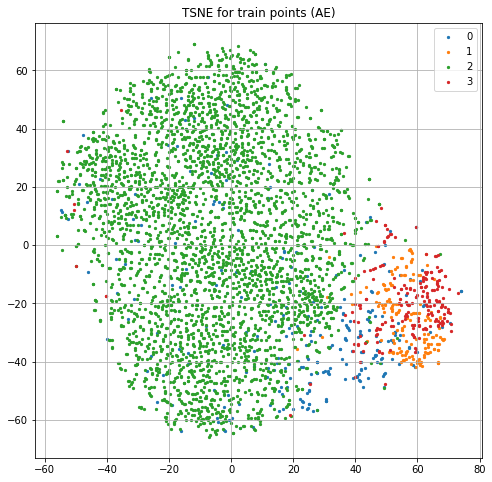

In [8]:
plt.figure(figsize=(8,8))
plt.title('TSNE for train points (AE)')
cmap = plt.get_cmap('jet', 4)
for key in range(len(np.unique(lbls))):
    plt.scatter(x_embedded[:, 0][lbls==key], x_embedded[:, 1][lbls==key], 
                s=20, alpha=1, marker='.', label=key)
plt.legend()
plt.grid(True)